In [32]:
import numpy as np
import random
from scipy.stats import weibull_min

In [58]:
X = weibull_min.rvs(c=1, size=40, random_state=201)
X = np.sort(X)
#Проверим,	что	в	выборке	нет	повторяющихся	значений:
np.any(X[1:] == X[:-1])

False

In [59]:
from statsmodels.distributions import ECDF
ecdf = ECDF(X)

In [60]:
xx = np.r_[0, X] # Добавляем 0 в начало
yy = np.repeat(1 / X.size, X.size) # Равные приращения функции распределения
yy = np.r_[0, yy.cumsum()] # Накопленные приращения, добавляем 0 в начало
from scipy.interpolate import interp1d
ec = interp1d(xx, yy, kind='previous', bounds_error=False) # Строим функцию распределения вручную

In [61]:
theoriticCDF = weibull_min.pdf(X, c=1)
theoriticCDF = 1 - theoriticCDF

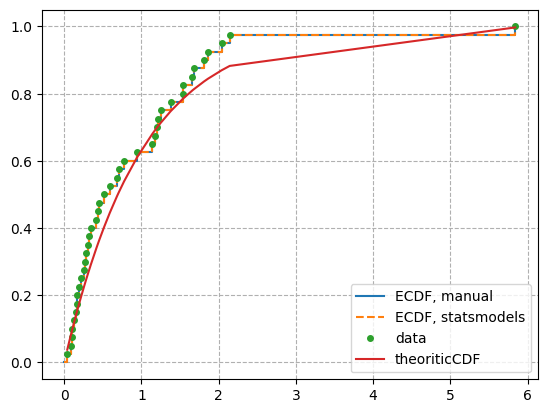

In [62]:
import matplotlib.pyplot as plt
x = np.sort(np.r_[0, X, X-1e-10, X+1e-10])
plt.plot(x, ec(x), '-', label='ECDF, manual')
plt.plot(x, ecdf(x), '--', label='ECDF, statsmodels')
plt.plot(X, yy[1:], '.', label='data', ms=8)
plt.plot(X, theoriticCDF, '-', label='theoriticCDF', ms=8)
plt.grid(ls='--')
plt.legend()

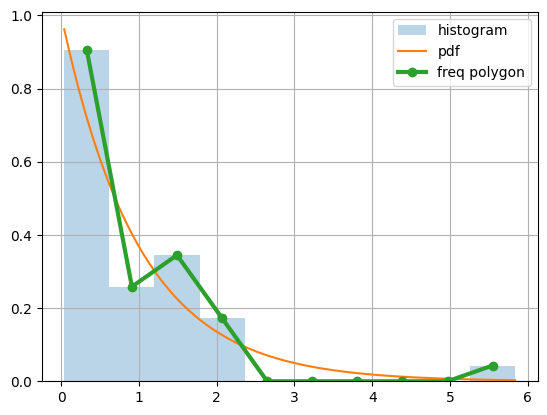

In [ ]:
plt.hist(X, bins='auto', density=True, alpha=0.3, label='histogram')
# the pdf itself
xx = np.linspace(X.min(), X.max(), 201)
plt.plot(xx, weibull_min.pdf(xx, c=1), '-', label='pdf')
# frequency polygon
hist, bin_edges = np.histogram(X, density='True', bins='auto')
mid = (bin_edges[1:] + bin_edges[:-1]) / 2 # центры интервалов
plt.plot(mid, hist, 'o-', label='freq polygon', lw=3)
plt.grid(True)
plt.legend(loc='best')